In [91]:
import os
import sys
import itertools

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

if '..' not in sys.path: sys.path.insert(0, '..')
from common import colors
import splines

In [92]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
    [0, 9],
    [1, 6],
    [2, 5],
    [3, 20],
    [4, 10],
    [5, 20],
    [6, 30],
    [7, 42],
    [8, 24],
    [9, 32],
    [10, 45],

])
order = 3

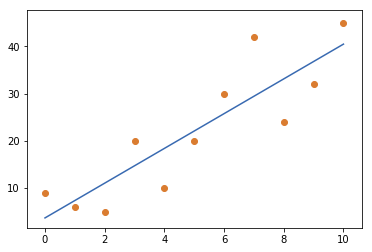

In [93]:
m = len(data)
X = np.array([np.ones(m), data[:, 0]]).T
y = np.array(data[:, 1]).reshape(-1, 1)
betaHat = np.linalg.solve(X.T.dot(X), X.T.dot(y))
plt.figure(1)
xx = np.linspace(0, 10, 5)
yy = np.array(betaHat[0] + betaHat[1] * xx)
plt.plot(xx, yy.T, color=colors.line_indexed[0])
plt.scatter(data[:, 0], data[:, 1], color=colors.line_indexed[1])
plt.show()


In [97]:
def b_spline_A(order, cp_size, data_size):
    assert(order <= cp_size)
    m = data_size
    n = cp_size
    knots = splines.uniform_knots(n, order)
    print(knots)
    knot_range = ((knots[-1]-0.01) - knots[0])

    rows = []
    for u in range(m):
        u = u / float(m-1)
        t = (u * knot_range) + knots[0]
        rows.append([splines.N(i, order-1, t, knots) for i in range(n)])
    A = np.array(rows)
    return A

In [100]:
m = len(data)
X = b_spline_A(order, m-3, m)
print(X)
y = np.array(data[:, 1]).reshape(-1, 1)
betaHat = np.linalg.solve(X.T.dot(X), X.T.dot(y))

[0, 0, 0, 1, 2, 3, 4, 5, 6, 6, 6]
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.60801000e-01   6.59798500e-01   1.79400500e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.21602000e-01   6.58796000e-01   1.96020000e-02
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.06045000e-02   6.61791000e-01   3.17604500e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.82408000e-01   7.39184000e-01
    7.84080000e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.25000000e-05   5.04975000e-01
    4.95012500e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   8.24180000e-02
    7.41164000e-01   1.76418000e-01   0.00000000e+

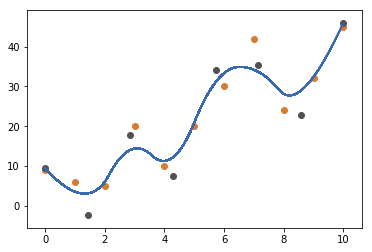

[  9.45474614  -2.36052208  17.88808059   7.57235552  34.25307149
  35.42038332  22.77227352  45.98128714]
[[  0.           9.45474614]
 [  1.42857143  -2.36052208]
 [  2.85714286  17.88808059]
 [  4.28571429   7.57235552]
 [  5.71428571  34.25307149]
 [  7.14285714  35.42038332]
 [  8.57142857  22.77227352]
 [ 10.          45.98128714]]


In [102]:
x_min = data[0][0]
x_max = data[-1][0]
x_range = x_max - x_min
y_values = betaHat[:, 0]
step = x_range / (len(y_values)-1)
cur = 0.0
x_values = []
for x in range(len(y_values)):
    x_values.append(cur)
    cur += step
control_points = np.array(list(zip(x_values, y_values)))
xx = np.linspace(0.0, 1.0, 100)
knots = splines.uniform_knots(len(control_points), order)
curve = splines.BSplineCurve(order, knots, control_points)
points = []
for u in range(0, 1000, 1):
    points.append(curve(u/1000.0))
    plt.plot([p[0] for p in points], [p[1] for p in points], color=colors.line["blue"])
plt.scatter(data[:, 0], data[:, 1], color=colors.line["orange"])
plt.scatter([p[0] for p in control_points], [p[1] for p in control_points], color=colors.line["grey"])
plt.show()
print(betaHat[:, 0])
print(control_points)